# Accuracy as a function of N
## Predicting the configuration of n atom arrays from probability graphs (data points)  
We used KAIST data (generated numerically) for different configurations of n atom arrays. 

## IMPORTANT: File names when importing
The order that the files are imported (and thus, the label for the configuration) will depend on the name of the file. Make sure to name the files you import with integers at the start  i.e. "n - " where $n \geq 0$ . As an example:

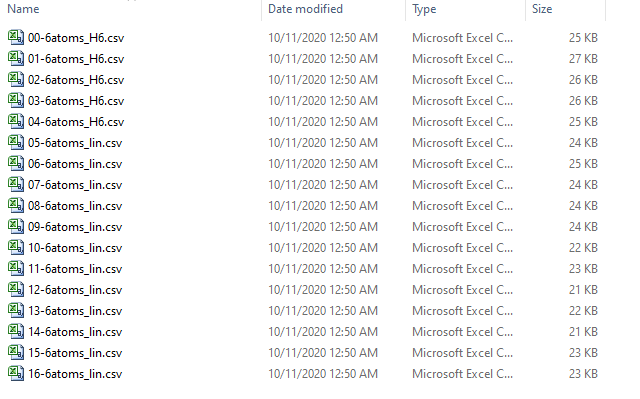

Then, the code below will import the file with the number 00 first, then 01, and so on.

# Input file paths

## Path to import data

In [1]:
# input the path to the folder that ONLY contains the data you want to import
# make sure there are no other files in the folder
files_folder_path = r"C:\Users\dell\0 Jupyter Notebooks - python\Dr Heejeong - UM Research\Project 1 - Machine learning of probabconfiguration from probability graphs\12.2.2021 KAIST Data\0 Used data\data N0 atoms lin N300 V13"

## Paths to save data points and plot

In [2]:
file_path_to_save_data_points = r"C:\Users\dell\0 Jupyter Notebooks - python\Dr Heejeong - UM Research\12.2.2021 KAIST Data\0 Used data\Accuracy against N"
file_path_to_save_plot = r"C:\Users\dell\0 Jupyter Notebooks - python\Dr Heejeong - UM Research\12.2.2021 KAIST Data\0 Used data\Accuracy against N"

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [4]:
data_files = os.listdir(files_folder_path)
data_files.sort()

dict_files = {}
for i in range(0, len(data_files)):
    df = pd.read_csv(files_folder_path + '\\' + data_files[i],header=None)
    # removing the time column
    df = df.iloc[:,1:]
    
    df = df.T
    
    config_list = [i]*df.shape[0]
    config = np.array(config_list)
    df.insert(0, "Configuration", config)
    dict_files["df{0}".format(i)] = df

dict_files.keys()

dict_keys(['df0', 'df1', 'df2', 'df3', 'df4', 'df5'])

# Files that were imported

In [5]:
data_files

['00-1atoms_S1_N0.csv',
 '01-2atoms_B2_N0.csv',
 '02-3atoms_lin_N0.csv',
 '03-4atoms_lin_N0.csv',
 '04-5atoms_lin_N0.csv',
 '05-6atoms_lin_N0.csv']

# Combining all the data into one pandas dataframe

In [6]:
keys = list(dict_files.keys())

frames = []
for i in keys:
    frames.append(dict_files[i])

df = pd.concat(frames)
df.index = list(range(1,df.shape[0]+1))

print("*The \"Configuration\" column in the df below corresponds to the number in the name of the file which the data was from.")
display(df)

*The "Configuration" column in the df below corresponds to the number in the name of the file which the data was from.


,Configuration,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
1,0,1.0,0.95,0.90,0.95,0.75,0.55,0.35,0.25,0.15,...,0.25,0.00,0.35,0.45,0.35,0.30,0.40,0.65,0.95,0.80
2,0,1.0,1.00,0.80,0.85,0.65,0.45,0.35,0.10,0.40,...,0.05,0.15,0.30,0.25,0.50,0.55,0.70,0.70,0.75,0.80
3,0,1.0,1.00,0.75,0.90,0.75,0.35,0.45,0.10,0.35,...,0.15,0.20,0.30,0.30,0.60,0.50,0.60,0.90,0.70,0.75
4,0,1.0,0.95,0.90,0.80,0.50,0.50,0.25,0.60,0.15,...,0.00,0.20,0.30,0.40,0.40,0.60,0.60,0.80,0.70,0.60
5,0,1.0,1.00,0.85,0.75,0.60,0.40,0.40,0.15,0.15,...,0.45,0.05,0.20,0.25,0.45,0.50,0.60,0.80,0.70,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,5,1.0,0.95,0.45,0.40,0.15,0.10,0.00,0.00,0.05,...,0.05,0.15,0.15,0.15,0.10,0.20,0.25,0.10,0.10,0.10
1797,5,1.0,0.80,0.55,0.25,0.10,0.05,0.05,0.00,0.00,...,0.10,0.10,0.10,0.05,0.10,0.15,0.10,0.30,0.05,0.05
1798,5,1.0,0.85,0.50,0.40,0.05,0.00,0.00,0.00,0.00,...,0.10,0.05,0.05,0.10,0.15,0.20,0.10,0.05,0.05,0.05
1799,5,1.0,0.90,0.55,0.25,0.05,0.10,0.00,0.00,0.00,...,0.05,0.10,0.20,0.05,0.30,0.35,0.20,0.10,0.05,0.00


In [7]:
df.shape

(1800, 22)

# Plot of accuracy against N

## Input number of x-axis points for the graph:

In [8]:
number_of_points = 21 #for x-axis of graph

In [9]:
accuracy_N_dict = {'N':[], 'Accuracy_SGD':[], 'sd_SGD':[], 'Accuracy_RFC':[], 'sd_RFC':[]}

initial_data_amount = df["Configuration"].value_counts()[0]
N_points = np.linspace(0, 0.8*initial_data_amount, number_of_points)
N_points_list = list(N_points) 

for k in N_points_list[1:]:
    index = N_points_list.index(k)
    percentage_of_data_to_use = N_points[index]/N_points[-1]

    if percentage_of_data_to_use == 1.0:
        train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify = df["Configuration"])
    else:
        train_set, test_set = train_test_split(df, test_size=percentage_of_data_to_use, random_state=42, stratify = df["Configuration"])
        train_set, test_set = train_test_split(test_set, test_size=0.2, random_state=42, stratify = test_set["Configuration"])

    X_train = train_set.iloc[0:,1:22].to_numpy()
    y_train_na = train_set["Configuration"].to_numpy()
    X_test = test_set.iloc[0:,1:22].to_numpy()
    y_test_na = test_set["Configuration"].to_numpy()

    N = train_set["Configuration"].value_counts()[0]
    
    #SGD model
    est = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
    sgd_clf = est.fit(X_train, y_train_na)
    
    scores = cross_val_score(sgd_clf, X_train, y_train_na, cv=10, scoring="accuracy")
    
    mean = round(scores.mean(), 2)
    sd = round(scores.std() * 2, 2)
    
    accuracy_N_dict['N'].append(N)
    accuracy_N_dict['Accuracy_SGD'].append(mean)
    accuracy_N_dict['sd_SGD'].append(sd)
  
    #RF classifier
    est = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
    rf_clf = est.fit(X_train, y_train_na)

    scores = cross_val_score(rf_clf, X_train, y_train_na, cv=10, scoring="accuracy")

    mean = round(scores.mean(), 2)
    sd = round(scores.std() * 2, 2)

    accuracy_N_dict['Accuracy_RFC'].append(mean)
    accuracy_N_dict['sd_RFC'].append(sd)

In [10]:
number_of_configurations = len(data_files)
accuracy_N_df = pd.DataFrame(accuracy_N_dict)
accuracy_N_df['N'] = number_of_configurations * accuracy_N_df['N']
accuracy_N_df

,N,Accuracy_SGD,sd_SGD,Accuracy_RFC,sd_RFC
0,72,0.86,0.28,0.86,0.18
1,144,0.88,0.17,0.89,0.18
2,216,0.89,0.18,0.92,0.09
3,288,0.92,0.11,0.96,0.09
4,360,0.91,0.12,0.94,0.07
5,432,0.91,0.06,0.93,0.08
6,504,0.92,0.07,0.93,0.11
7,576,0.92,0.06,0.94,0.07
8,648,0.93,0.06,0.93,0.06
9,720,0.93,0.02,0.94,0.04


# Save data points of accuracy plot

In [11]:
# file_path_to_save_data_points = r"C:\Users\dell\0 Jupyter Notebooks - python\Dr Heejeong - UM Research\12.2.2021 KAIST Data\0 Used data\Accuracy against N"

In [12]:
files_folder_path.rpartition('\\')[-1]

'data N0 atoms lin N300 V13'

In [13]:
data_points_file_name = files_folder_path.rpartition('\\')[-1]

In [14]:
file_path_to_save_data_points = file_path_to_save_data_points + "\\" + data_points_file_name + ' - data points.csv'

In [15]:
# we need to provide the file name at the end in the form of .csv
# accuracy_N_df.to_csv(file_path_to_save_data_points, index = False, header=True)

# File path to save plot

In [16]:
# file_path_to_save_plot = r"C:\Users\dell\0 Jupyter Notebooks - python\Dr Heejeong - UM Research\12.2.2021 KAIST Data\0 Used data\Accuracy against N"

In [17]:
files_folder_path.rpartition('\\')[-1]

'data N0 atoms lin N300 V13'

In [18]:
data_points_file_name = files_folder_path.rpartition('\\')[-1]

In [19]:
file_path_to_save_plot = file_path_to_save_plot + "\\" + data_points_file_name + ' - plot.pdf'

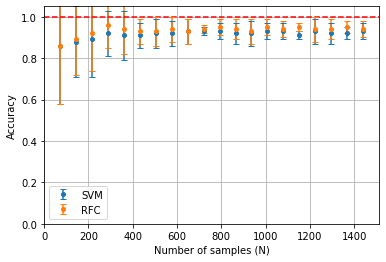

In [20]:
x = accuracy_N_df.iloc[:,0]
y1 = accuracy_N_df.iloc[:,1]
y1err = accuracy_N_df.iloc[:,2]
y2 = accuracy_N_df.iloc[:,3]
y2err = accuracy_N_df.iloc[:,4]

plt.errorbar(x,y1,
            yerr=y1err,
            fmt='o',
            ms=4, 
            capsize=3,
            label='SVM')

plt.errorbar(x,y2,
            yerr=y1err,
            fmt='o',
            ms=4, 
            capsize=3,
            label='RFC')

# # Set x limits
plt.xlim(0, x.iloc[-1]*1.05)
# Set y limits
plt.ylim(0.0, 1.05)

# plt.title('Plot of accuracy against N')
plt.xlabel('Number of samples (N)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.hlines(1,0,x.iloc[-1]*1.05, colors='r', linestyles='dashed')
# plt.savefig(file_path_to_save_plot, dpi=300, bbox_inches='tight')
plt.show()